# Pre-requisite

- Create the analysis environment using the `conda` and the shared `environment.txt` file
- Use the following command for the same 



```
conda create -n new analysis --file environment.txt
```


### Importing libraries for the analysis


In [2]:

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns   
from scipy import stats
%matplotlib inline 



### Reading in the data from the `csv` sources

#### `application_data.csv`


In [3]:
application_data=pd.read_csv("../data/raw/application_data.csv")
application_data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### The shape of `application_data` csv

In [4]:
application_data.shape




(307511, 122)

#### The columns in the `application_data` csv


In [5]:
application_data.columns.values


array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',



#### General `info()` of the `application_data`



In [ ]:
application_data.info()


#### Using the `describe()` on the `application_data` to get a general sense of numerical columns


In [6]:
application_data.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### Reading in the  `previous_application.csv` data


In [7]:
previous_application=pd.read_csv("../data/raw/previous_application.csv")
previous_application.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### The shape of `previous_application` csv

In [8]:
previous_application.shape




(1670214, 37)

#### The columns in the `previous_application` csv


In [9]:
previous_application.columns.values


array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)



#### General `info()` of the `previous_application`



In [10]:
previous_application.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

#### Using the `describe()` on the `previous_application` to get a general sense of numerical columns


In [11]:
previous_application.describe()



,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000



# Data cleaning and manipulation


#### Feature Distribution

In [12]:
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print("numerical_features:",numerical_features)
    

#### Categorical and Numerical features in `application_data.csv`

In [13]:
type_features(application_data)

 

categorical_features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
numerical_features: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)


#### Categorical and Numerical features in `preivous_application.csv`


In [14]:
type_features(previous_application)


categorical_features : Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')



# DATA IMBALANCE

Only 91.9% of the total customer are repaying the loan. We need to get better insights from the data and see which categories of the customer are not able to pay back loan.

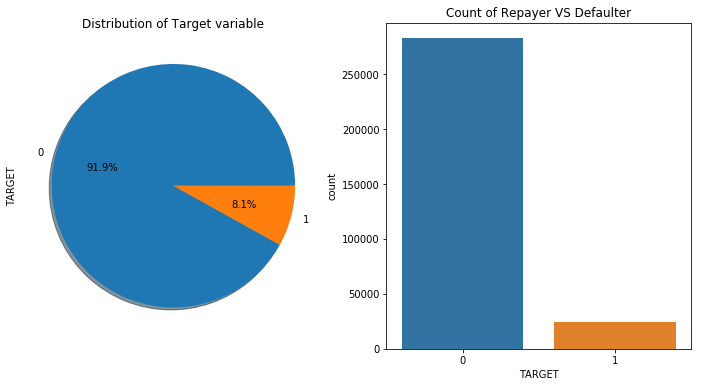

In [16]:
f,ax=plt.subplots(1,2,figsize=(12,6))
application_data.TARGET.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of Target variable')
sns.countplot('TARGET',data=application_data,ax=ax[1])
ax[1].set_title('Count of Repayer VS Defaulter')
plt.show()

In [17]:
# function to analys missing values in a dataset

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 40]
    f,ax =plt.subplots(figsize=(15,10))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by Cloumns>40%', fontsize=15)
    return ms


### Missing Value analysis for `application_data.csv`
Here in the plots it is showing columns which have more than 40% null/missing values in the dataset

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


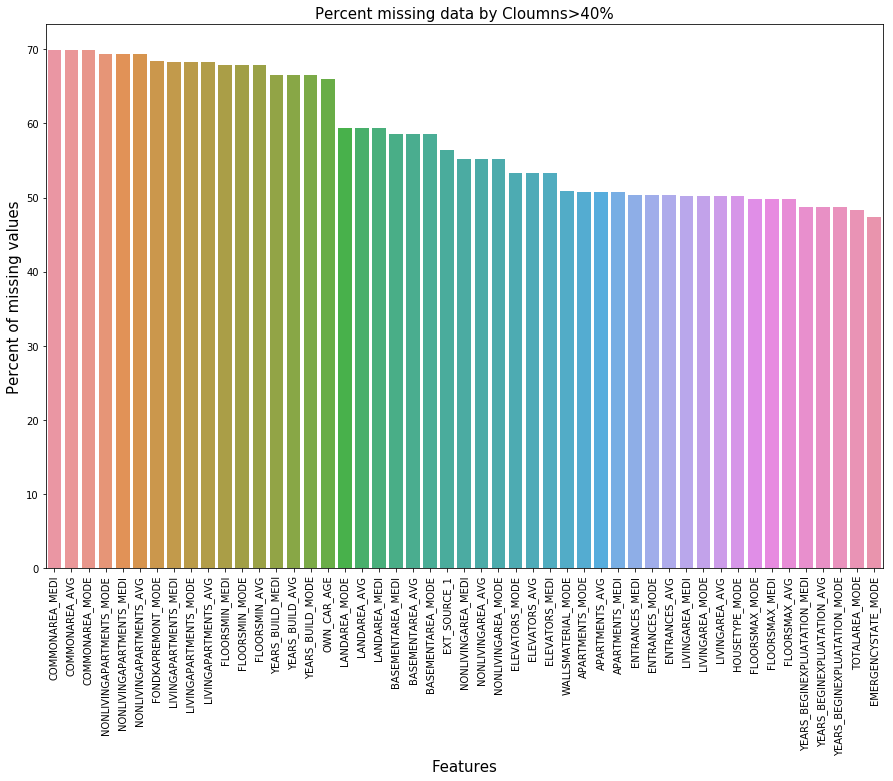

In [18]:
missingdata(application_data)

#below is the detils of the columns which has missing value more than 40% in application_data.
#We have two ways:
#1) Replace them with mean mode median but doing so will effect the dataset and could mislead the EDA.
#2) As the allowable missing value % is about more or less 40%.So we can keep the columns who has missing value less than 40%
#   and can drop them.

In [ ]:
# we are dropping the columns who have null values greater than 40%

#df.drop(['C', 'D'], axis = 1)



### Missing Value analysis for `previous_application.csv`

Here in the plots it is showing columns which have more than 40% null/missing values in the dataset


,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


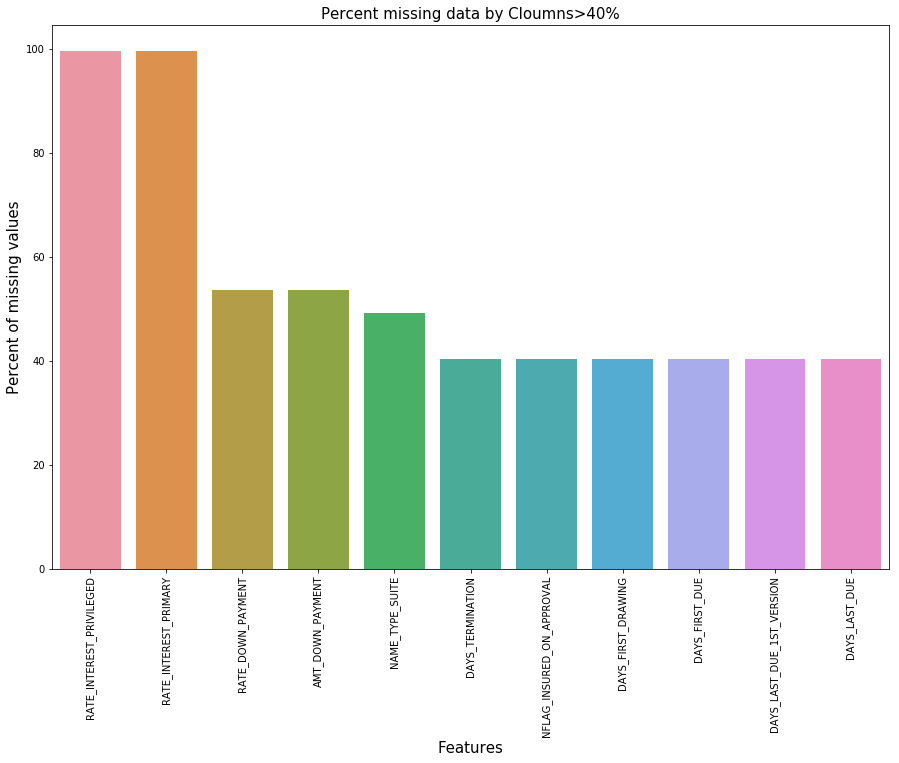

In [20]:
missingdata(previous_application)
#below is the deatils of the columns which has missing value more than 40% in application_data.
#We have two ways:
#1) Replace them with mean mode median but doing so will effect the dataset and could mislead the EDA.
#2) As the allowable missing value % is about more or less 40%.So we can keep the columns who has missing value less than 40%
#   and can drop them.



# OUTLIER REMOVAL - IQR method


## `application_data.csv`



#### Doing the IQR analysis to find the outliers in the dataset


In [21]:

application_data_numerical_values = application_data[application_data.select_dtypes(exclude = ["object"]).columns]
application_data_numerical_values.drop(['SK_ID_CURR'], axis=1, inplace=True)
application_data_numerical_values


/Users/eklavya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,0,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,-1213.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,0,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,-4597.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,-7427.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,0,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019,-14437.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN



#### First quantile


In [22]:
Q1 = application_data_numerical_values.quantile(0.25)
Q1



TARGET                              0.000000
CNT_CHILDREN                        0.000000
AMT_INCOME_TOTAL               112500.000000
AMT_CREDIT                     270000.000000
AMT_ANNUITY                     16524.000000
AMT_GOODS_PRICE                238500.000000
REGION_POPULATION_RELATIVE          0.010006
DAYS_BIRTH                     -19682.000000
DAYS_EMPLOYED                   -2760.000000
DAYS_REGISTRATION               -7479.500000
DAYS_ID_PUBLISH                 -4299.000000
OWN_CAR_AGE                         5.000000
FLAG_MOBIL                          1.000000
FLAG_EMP_PHONE                      1.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    1.000000
FLAG_PHONE                          0.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     2.000000
REGION_RATING_CLIENT                2.000000
REGION_RATING_CLIENT_W_CITY         2.000000
HOUR_APPR_PROCESS_START            10.000000
REG_REGION


#### Third quantile


In [23]:
Q3 = application_data_numerical_values.quantile(0.75)
Q3

TARGET                              0.000000
CNT_CHILDREN                        1.000000
AMT_INCOME_TOTAL               202500.000000
AMT_CREDIT                     808650.000000
AMT_ANNUITY                     34596.000000
AMT_GOODS_PRICE                679500.000000
REGION_POPULATION_RELATIVE          0.028663
DAYS_BIRTH                     -12413.000000
DAYS_EMPLOYED                    -289.000000
DAYS_REGISTRATION               -2010.000000
DAYS_ID_PUBLISH                 -1720.000000
OWN_CAR_AGE                        15.000000
FLAG_MOBIL                          1.000000
FLAG_EMP_PHONE                      1.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    1.000000
FLAG_PHONE                          1.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     3.000000
REGION_RATING_CLIENT                2.000000
REGION_RATING_CLIENT_W_CITY         2.000000
HOUR_APPR_PROCESS_START            14.000000
REG_REGION


#### Interquantile Range (IQR) in the `application_data.csv`


In [24]:
IQR = Q3 - Q1
IQR


TARGET                              0.000000
CNT_CHILDREN                        1.000000
AMT_INCOME_TOTAL                90000.000000
AMT_CREDIT                     538650.000000
AMT_ANNUITY                     18072.000000
AMT_GOODS_PRICE                441000.000000
REGION_POPULATION_RELATIVE          0.018657
DAYS_BIRTH                       7269.000000
DAYS_EMPLOYED                    2471.000000
DAYS_REGISTRATION                5469.500000
DAYS_ID_PUBLISH                  2579.000000
OWN_CAR_AGE                        10.000000
FLAG_MOBIL                          0.000000
FLAG_EMP_PHONE                      0.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    0.000000
FLAG_PHONE                          1.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     1.000000
REGION_RATING_CLIENT                0.000000
REGION_RATING_CLIENT_W_CITY         0.000000
HOUR_APPR_PROCESS_START             4.000000
REG_REGION

In [25]:
z=(application_data_numerical_values < (Q1 - 1.5 * IQR)) | (application_data_numerical_values > (Q3 + 1.5 * IQR))
z


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
7,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Normalizing the `application_data.csv` 


In [26]:

application_data_normalized = application_data_numerical_values[~((application_data_numerical_values < (Q1 - 1.5 * IQR)) |(application_data_numerical_values > (Q3 + 1.5 * IQR))).any(axis=1)]
application_data_normalized


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,0,0,135000.0,405000.0,20250.0,405000.0,0.019689,-14469,-2019,-14437.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
13,0,1,225000.0,918468.0,28966.5,697500.0,0.016612,-14086,-3028,-643.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
20,0,0,135000.0,427500.0,21375.0,427500.0,0.015221,-18252,-4286,-298.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
25,0,0,90000.0,225000.0,11074.5,225000.0,0.028663,-19334,-3494,-2419.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
29,0,0,90000.0,180000.0,9000.0,180000.0,0.030755,-10341,-1010,-4799.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
34,0,0,135000.0,1125000.0,32895.0,1125000.0,0.019689,-15997,-4585,-5735.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
63,0,0,112500.0,95940.0,10462.5,90000.0,0.004960,-12240,-3720,-5246.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
66,0,0,180000.0,1035000.0,43983.0,1035000.0,0.028663,-19550,-4856,-6836.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
68,0,1,157500.0,450000.0,22500.0,450000.0,0.010966,-11956,-3154,-8118.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0


#### Shape of the normalized `application_data.csv`


In [28]:
application_data_normalized.shape



(26808, 105)


# Outlier detection and removal from the `previous_application.csv` dataset


In [29]:

previous_application.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
previous_application_numerical_values = previous_application[previous_application.select_dtypes(exclude = ["object"]).columns]
previous_application_numerical_values.drop(['SK_ID_CURR', 'SK_ID_PREV'], axis=1, inplace=True)
previous_application_numerical_values.dropna(inplace=True)
previous_application_numerical_values


/Users/eklavya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.000,17145.000,0.000,17145.000,15,1,0.000000,0.182832,0.867336,-73,35,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
30,3286.485,32562.000,32562.000,0.000,32562.000,12,1,0.000000,0.196914,0.867336,-307,20,12.0,365243.0,-273.0,57.0,-183.0,-179.0,0.0
506,6408.540,79372.215,63495.000,15877.215,79372.215,16,1,0.217856,0.189136,0.835095,-135,51,12.0,365243.0,-100.0,230.0,-40.0,-37.0,0.0
598,14152.545,153387.000,138046.500,15340.500,153387.000,9,1,0.108922,0.695668,0.568710,-690,30,12.0,365243.0,-659.0,-329.0,-329.0,-323.0,0.0
659,1335.600,16279.290,13027.500,3251.790,16279.290,13,1,0.217546,0.191757,0.845137,-253,100,12.0,365243.0,-220.0,110.0,-130.0,-123.0,0.0
962,3887.820,48153.960,38520.000,9633.960,48153.960,20,1,0.217890,0.189122,0.835095,-267,35,12.0,365243.0,-233.0,97.0,-143.0,-135.0,0.0
1027,8021.115,79868.160,79472.160,7987.500,79868.160,11,1,0.099464,0.193330,0.852537,-301,15,12.0,365243.0,-261.0,69.0,-201.0,-196.0,0.0
1028,3117.915,38403.270,30721.500,7681.770,38403.270,10,1,0.217850,0.160716,0.715645,-336,47,12.0,365243.0,-297.0,33.0,-207.0,-199.0,0.0
1274,3031.695,30037.500,30037.500,0.000,30037.500,18,1,0.000000,0.196900,0.867336,-182,30,12.0,365243.0,-131.0,199.0,-71.0,-68.0,0.0
1360,8670.375,85905.000,85905.000,0.000,85905.000,18,1,0.000000,0.196914,0.867336,-427,25,12.0,365243.0,-391.0,-61.0,-301.0,-293.0,0.0



#### First quantile


In [31]:
Q1 = previous_application_numerical_values.quantile(0.25)
Q1


AMT_ANNUITY                    3135.240000
AMT_APPLICATION               34865.910000
AMT_CREDIT                    31063.500000
AMT_DOWN_PAYMENT               3611.700000
AMT_GOODS_PRICE               34865.910000
HOUR_APPR_PROCESS_START          12.000000
NFLAG_LAST_APPL_IN_DAY            1.000000
RATE_DOWN_PAYMENT                 0.099545
RATE_INTEREST_PRIMARY             0.160716
RATE_INTEREST_PRIVILEGED          0.715645
DAYS_DECISION                  -469.000000
SELLERPLACE_AREA                 25.000000
CNT_PAYMENT                      12.000000
DAYS_FIRST_DRAWING           365243.000000
DAYS_FIRST_DUE                 -431.000000
DAYS_LAST_DUE_1ST_VERSION      -101.000000
DAYS_LAST_DUE                  -323.000000
DAYS_TERMINATION               -316.000000
NFLAG_INSURED_ON_APPROVAL         0.000000
Name: 0.25, dtype: float64


#### Third quantile

In [32]:
Q3 = previous_application_numerical_values.quantile(0.75)
Q3


AMT_ANNUITY                    6773.535000
AMT_APPLICATION               75902.535000
AMT_CREDIT                    67031.775000
AMT_DOWN_PAYMENT              12214.383750
AMT_GOODS_PRICE               75902.535000
HOUR_APPR_PROCESS_START          17.000000
NFLAG_LAST_APPL_IN_DAY            1.000000
RATE_DOWN_PAYMENT                 0.217827
RATE_INTEREST_PRIMARY             0.193330
RATE_INTEREST_PRIVILEGED          0.852537
DAYS_DECISION                  -170.000000
SELLERPLACE_AREA                 50.000000
CNT_PAYMENT                      12.000000
DAYS_FIRST_DRAWING           365243.000000
DAYS_FIRST_DUE                 -126.750000
DAYS_LAST_DUE_1ST_VERSION       205.000000
DAYS_LAST_DUE                365243.000000
DAYS_TERMINATION             365243.000000
NFLAG_INSURED_ON_APPROVAL         0.000000
Name: 0.75, dtype: float64


#### Interquantile Range (IQR) in the `previous_application.csv`


In [33]:

IQR = Q3 - Q1
IQR


AMT_ANNUITY                    3638.295000
AMT_APPLICATION               41036.625000
AMT_CREDIT                    35968.275000
AMT_DOWN_PAYMENT               8602.683750
AMT_GOODS_PRICE               41036.625000
HOUR_APPR_PROCESS_START           5.000000
NFLAG_LAST_APPL_IN_DAY            0.000000
RATE_DOWN_PAYMENT                 0.118282
RATE_INTEREST_PRIMARY             0.032614
RATE_INTEREST_PRIVILEGED          0.136892
DAYS_DECISION                   299.000000
SELLERPLACE_AREA                 25.000000
CNT_PAYMENT                       0.000000
DAYS_FIRST_DRAWING                0.000000
DAYS_FIRST_DUE                  304.250000
DAYS_LAST_DUE_1ST_VERSION       306.000000
DAYS_LAST_DUE                365566.000000
DAYS_TERMINATION             365559.000000
NFLAG_INSURED_ON_APPROVAL         0.000000
dtype: float64

In [ ]:
z=(previous_application_numerical_values < (Q1 - 1.5 * IQR)) |(previous_application_numerical_values > (Q3 + 1.5 * IQR))
z


In [34]:

print(previous_application_numerical_values < (Q1 - 1.5 * IQR)) | (previous_application_numerical_values > (Q3 + 1.5 * IQR))


         AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  \
0              False            False       False             False   
30             False            False       False             False   
506            False            False       False             False   
598            False            False       False             False   
659            False            False       False             False   
962            False            False       False             False   
1027           False            False       False             False   
1028           False            False       False             False   
1274           False            False       False             False   
1360           False            False       False             False   
1518           False            False       False             False   
1760           False            False       False             False   
2261           False            False       False             False   
2411  

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [35]:

previous_application_normalized = previous_application_numerical_values[~((previous_application_numerical_values < (Q1 - 1.5 * IQR)) |(previous_application_numerical_values > (Q3 + 1.5 * IQR))).any(axis=1)]
previous_application_normalized


,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.000,17145.00,0.000,17145.000,15,1,0.000000,0.182832,0.867336,-73,35,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
30,3286.485,32562.000,32562.00,0.000,32562.000,12,1,0.000000,0.196914,0.867336,-307,20,12.0,365243.0,-273.0,57.0,-183.0,-179.0,0.0
506,6408.540,79372.215,63495.00,15877.215,79372.215,16,1,0.217856,0.189136,0.835095,-135,51,12.0,365243.0,-100.0,230.0,-40.0,-37.0,0.0
962,3887.820,48153.960,38520.00,9633.960,48153.960,20,1,0.217890,0.189122,0.835095,-267,35,12.0,365243.0,-233.0,97.0,-143.0,-135.0,0.0
1027,8021.115,79868.160,79472.16,7987.500,79868.160,11,1,0.099464,0.193330,0.852537,-301,15,12.0,365243.0,-261.0,69.0,-201.0,-196.0,0.0
1028,3117.915,38403.270,30721.50,7681.770,38403.270,10,1,0.217850,0.160716,0.715645,-336,47,12.0,365243.0,-297.0,33.0,-207.0,-199.0,0.0
1274,3031.695,30037.500,30037.50,0.000,30037.500,18,1,0.000000,0.196900,0.867336,-182,30,12.0,365243.0,-131.0,199.0,-71.0,-68.0,0.0
1360,8670.375,85905.000,85905.00,0.000,85905.000,18,1,0.000000,0.196914,0.867336,-427,25,12.0,365243.0,-391.0,-61.0,-301.0,-293.0,0.0
1760,2939.040,32355.000,29119.50,3235.500,32355.000,18,1,0.108909,0.193330,0.852537,-164,50,12.0,365243.0,-120.0,210.0,-60.0,-55.0,0.0
2261,5953.455,73735.650,58986.00,14749.650,73735.650,20,1,0.217855,0.189136,0.835095,-391,50,12.0,365243.0,-355.0,-25.0,-25.0,-23.0,0.0


In [ ]:
previous_application_normalized.shape









# Univariate analysis

### `application_data.csv`



In [ ]:

#### 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

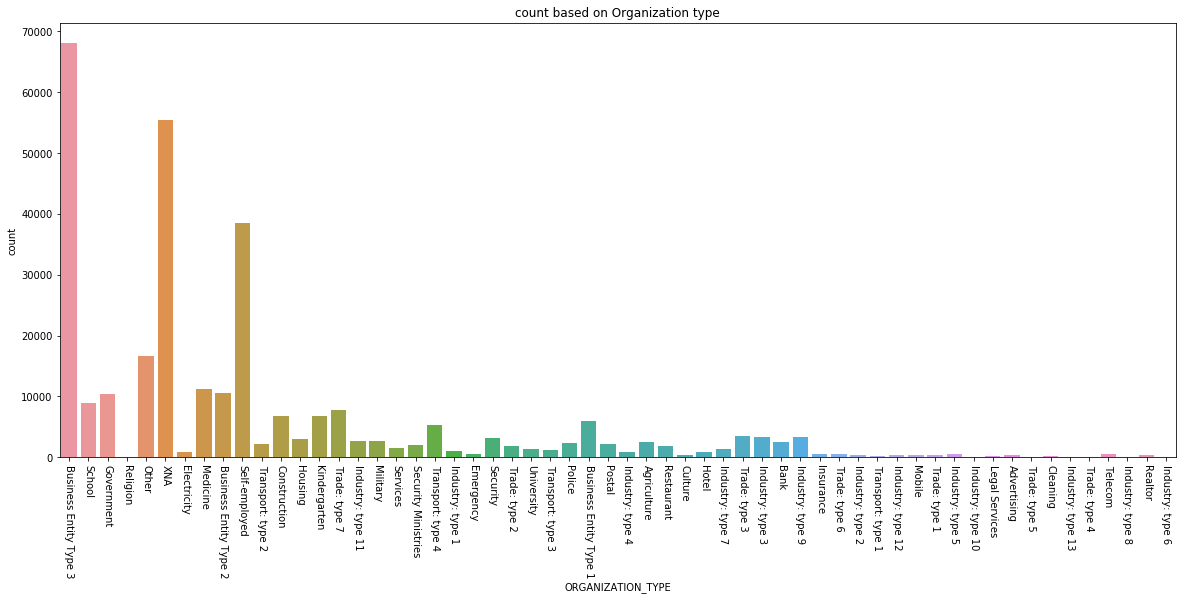

In [36]:
f, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='ORGANIZATION_TYPE', data=application_data).set_title('count based on Organization type');
# Rotate x-labels
plt.xticks(rotation=-90)

Text(0.5, 1.0, 'REpayer VS Defaulter based on Organization type')

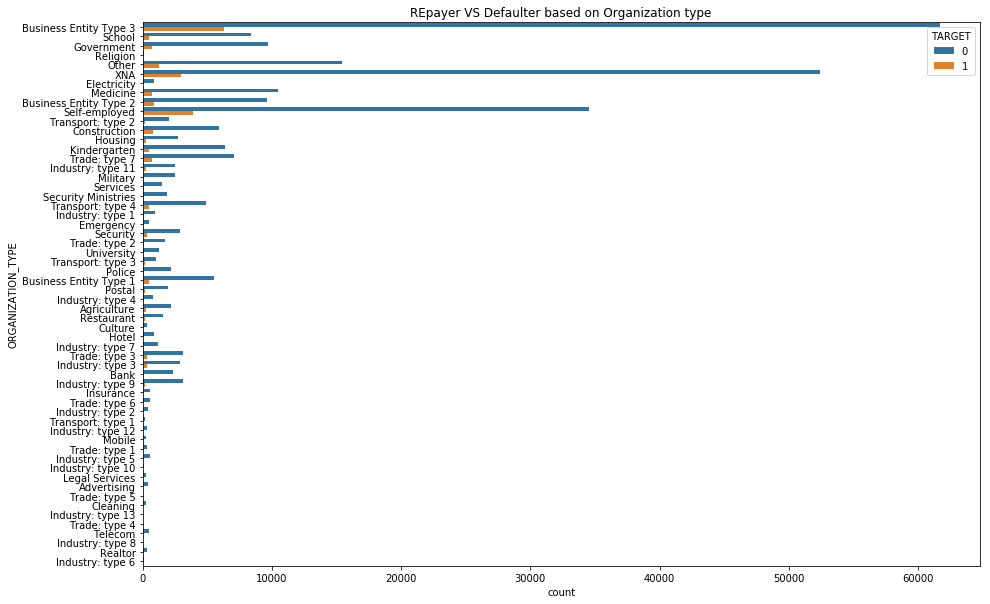

In [37]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="ORGANIZATION_TYPE", hue='TARGET', 
              data=application_data).set_title('REpayer VS Defaulter based on Organization type')



# Bivariate analysis


#### Categorical Features

In [52]:
def plot_re(df,t1='',t2=''):
    f,ax=plt.subplots(1,2,figsize=(10,6))
    df[[t1,t2]].groupby([t1]).count().plot.bar(ax=ax[0],color='Green')
    ax[0].set_title('count of customer Based on'+t1)
    sns.countplot(t1,hue=t2,data=df,ax=ax[1],palette="spring")
    ax[1].set_title(t1+': Repayer vs Defualter')
    # Rotate x-labels
    plt.xticks(rotation=-90)
    a=plt.show()
    return a

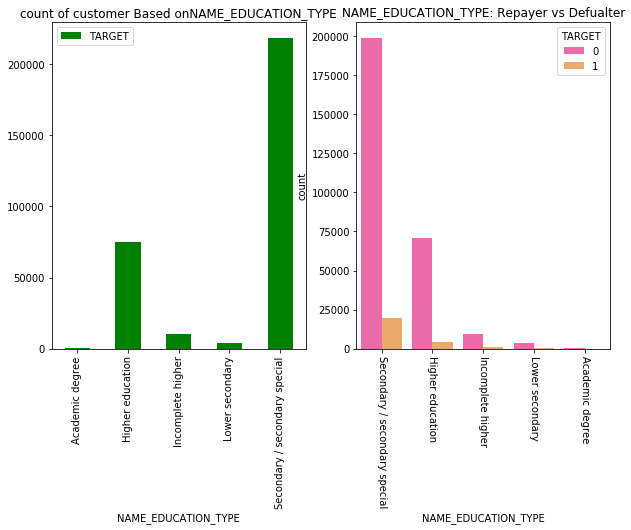

In [53]:
plot_re(application_data,'NAME_EDUCATION_TYPE','TARGET')

Secondary/secondary special is not able to pay the loan

Gender Analysis

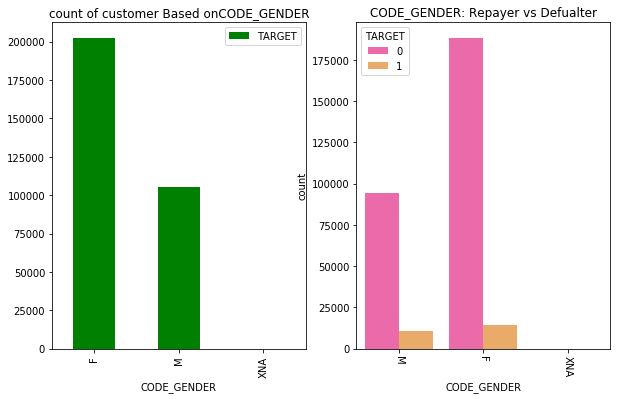

In [54]:
plot_re(application_data,'CODE_GENDER','TARGET')

Female has high count and not able to pay the loan back

Analysis based on income type

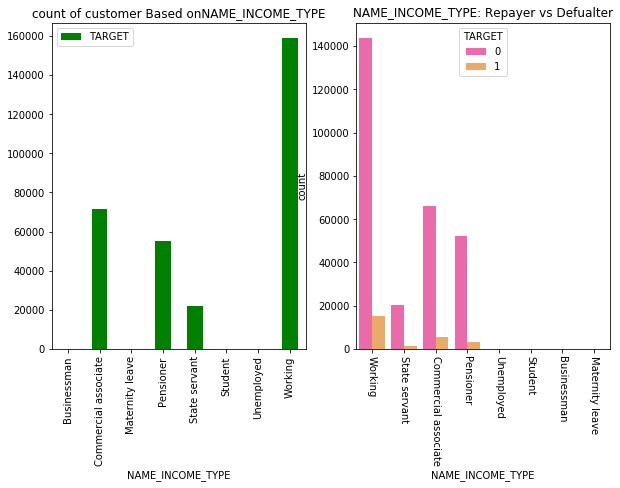

In [55]:
plot_re(application_data,'NAME_INCOME_TYPE','TARGET')

Working has high count and not ale to repay the loan as compared to others

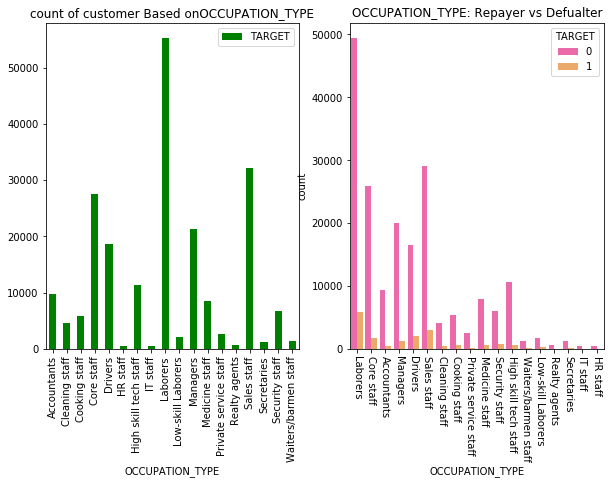

In [56]:
plot_re(application_data,'OCCUPATION_TYPE','TARGET')

Laborers are high in number

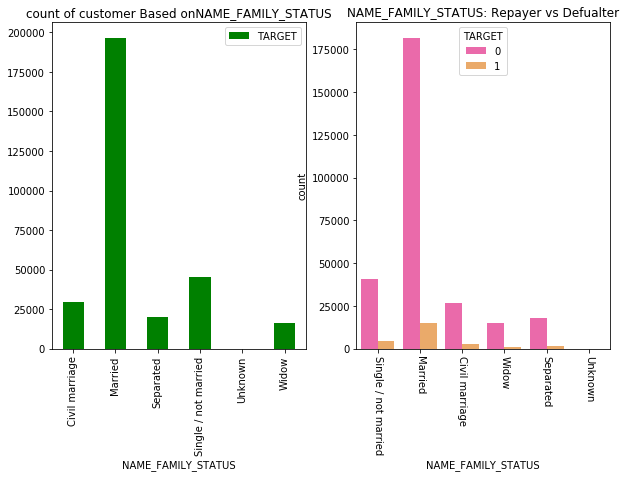

In [57]:
plot_re(application_data,'NAME_FAMILY_STATUS','TARGET')

Married are not able to pay the loans

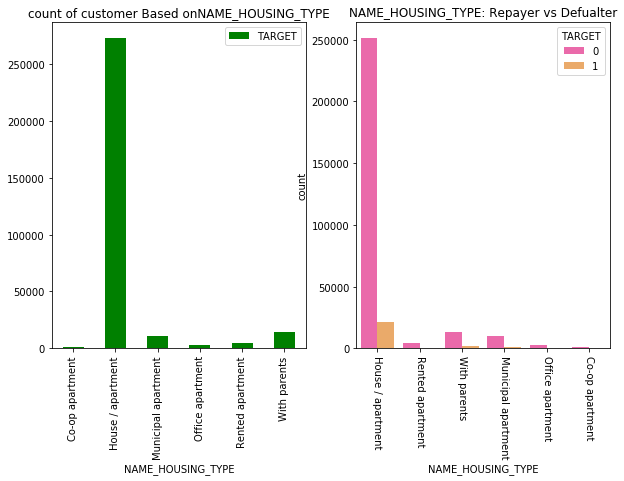

In [58]:
plot_re(application_data,'NAME_HOUSING_TYPE','TARGET')

House/Apartments have high count

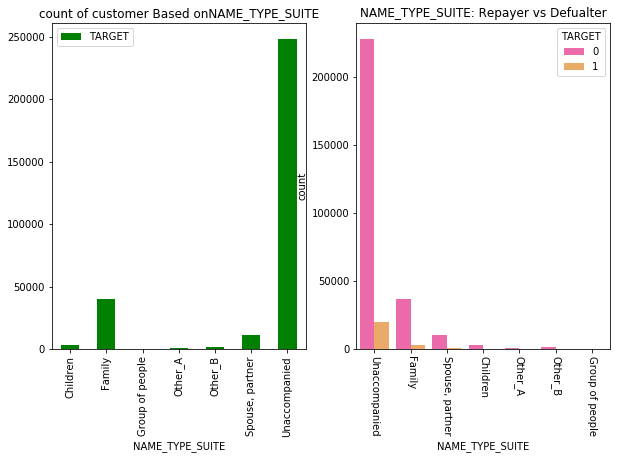

In [59]:
plot_re(application_data,'NAME_TYPE_SUITE','TARGET')

Unacompanied customer are very much lijkely to be defaulter

Oraganization type


Bussiness type 3 is the deafaulter

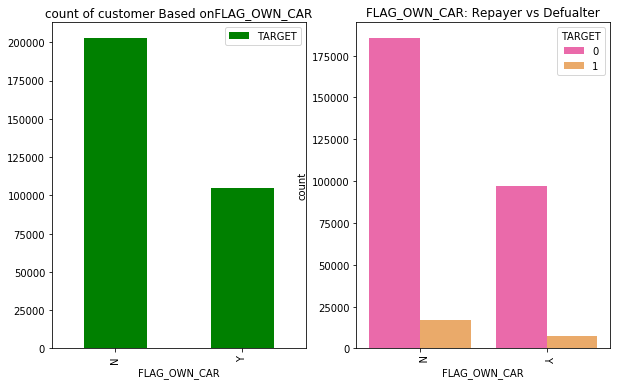

In [62]:
plot_re(application_data,'FLAG_OWN_CAR','TARGET')

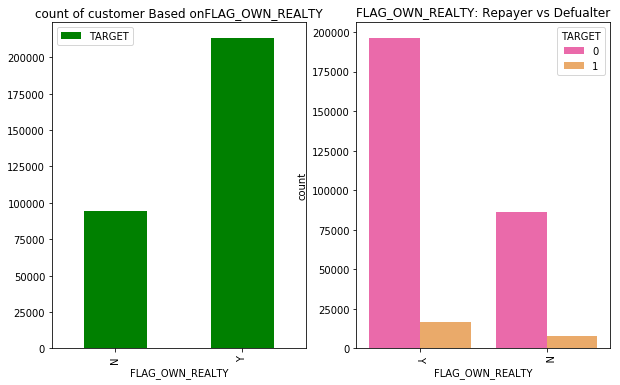

In [63]:
plot_re(application_data,'FLAG_OWN_REALTY','TARGET')

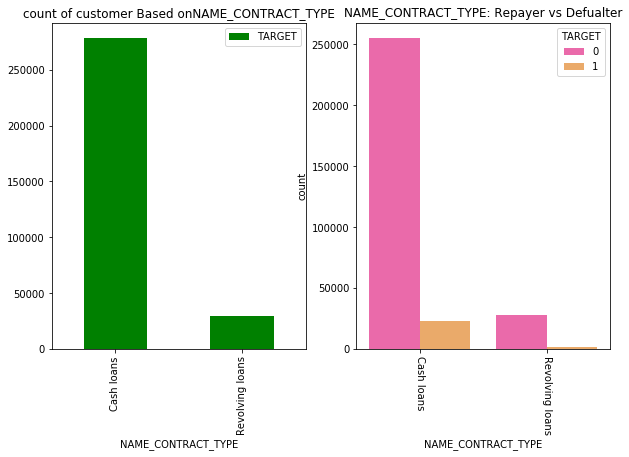

In [64]:
plot_re(application_data,'NAME_CONTRACT_TYPE','TARGET')

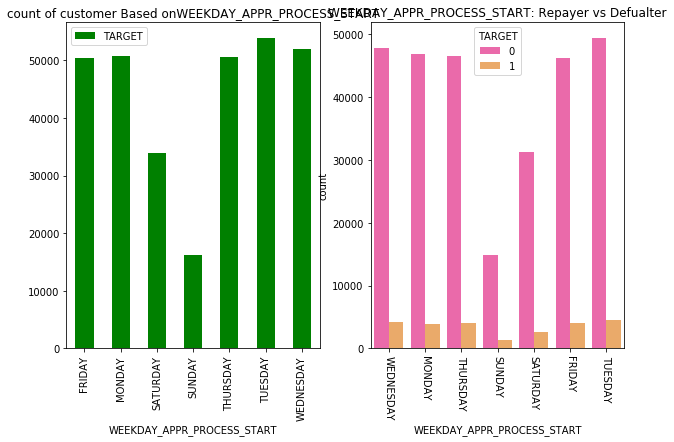

In [65]:
plot_re(application_data,'WEEKDAY_APPR_PROCESS_START','TARGET')

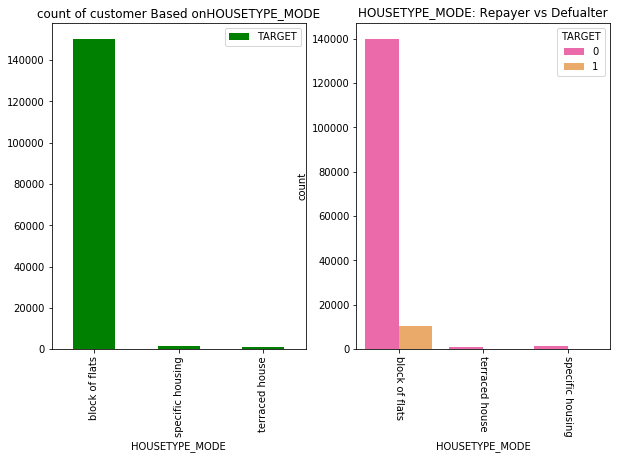

In [66]:
plot_re(application_data,'HOUSETYPE_MODE','TARGET')

Customers on locks of flat are more likely to be defaulter

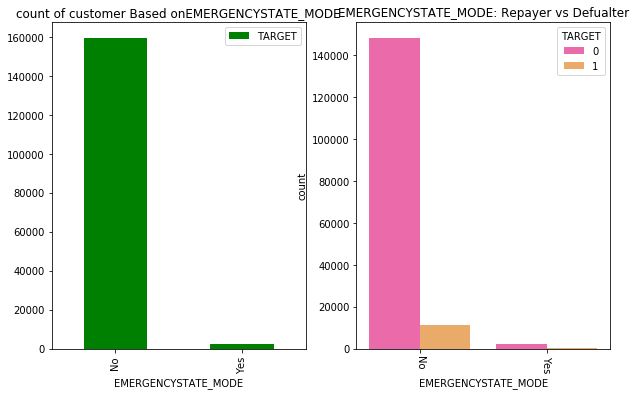

In [67]:
plot_re(application_data,'EMERGENCYSTATE_MODE','TARGET')

#### ANALYSIS THE NUMBERICAL FEATURES

AGE

In [68]:
(application_data['DAYS_BIRTH'] / -365).describe()

#Loan is provided to people of age between 20-70

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

DAYS EMPLOYED

In [69]:
(application_data['DAYS_EMPLOYED'] / 365).describe()

#here min years comes out to be -49 and max years is 1000.So data is not correct.

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

CHILDREN COUNT

Text(0.5, 1.0, 'Children count Distribution - Repayer V.S. Non Repayers')

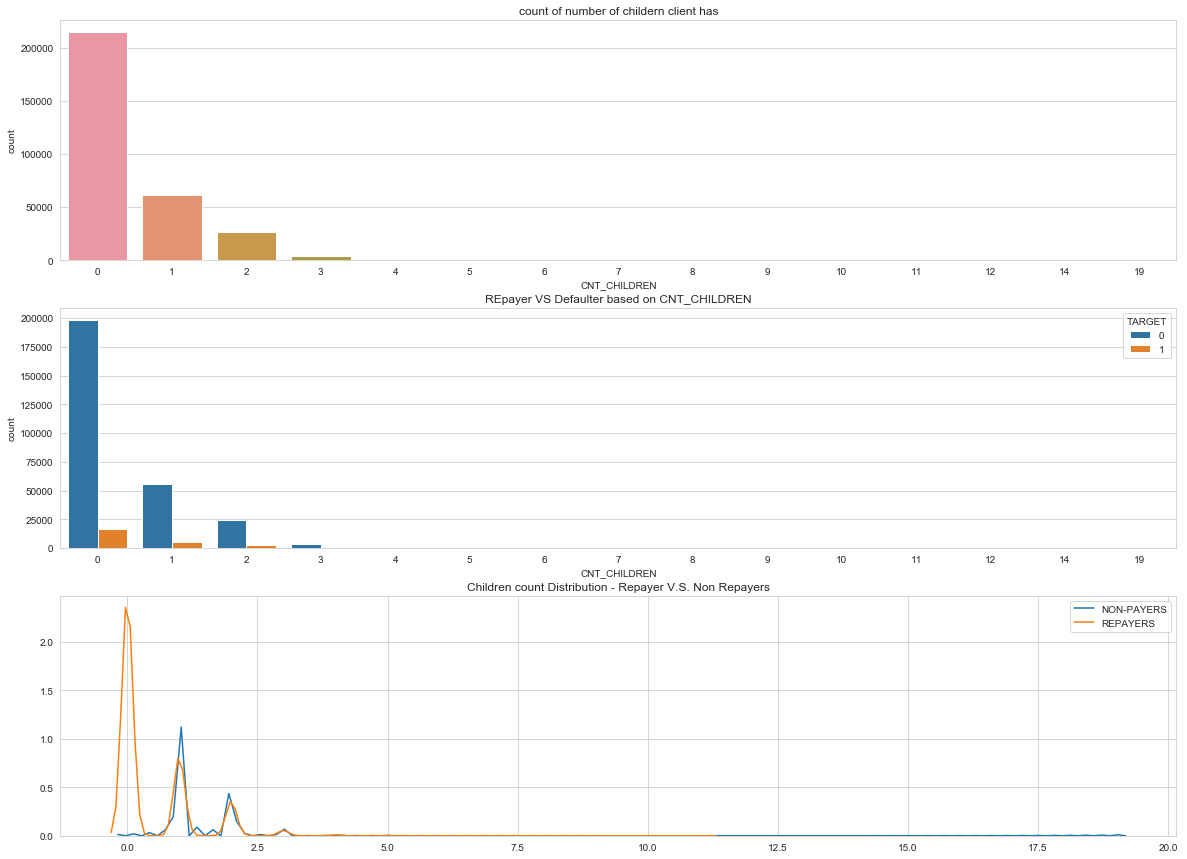

In [70]:
sns.set_style('whitegrid')
f, ax = plt.subplots(3,1,figsize=(20,15))

sns.countplot(x='CNT_CHILDREN', data=application_data, ax=ax[0]).set_title('count of number of childern client has');

sns.countplot("CNT_CHILDREN", hue='TARGET', 
              data=application_data,ax=ax[1]).set_title('REpayer VS Defaulter based on CNT_CHILDREN')

ax[2]=sns.kdeplot(application_data.loc[(application_data['TARGET'] == 0),'CNT_CHILDREN'] ,label='NON-PAYERS')
ax[2]=sns.kdeplot(application_data.loc[(application_data['TARGET'] == 1),'CNT_CHILDREN'],label='REPAYERS')
ax[2].set_title('Children count Distribution - Repayer V.S. Non Repayers')


Text(0.5, 1.0, 'customer Amount Annual income Distribution')

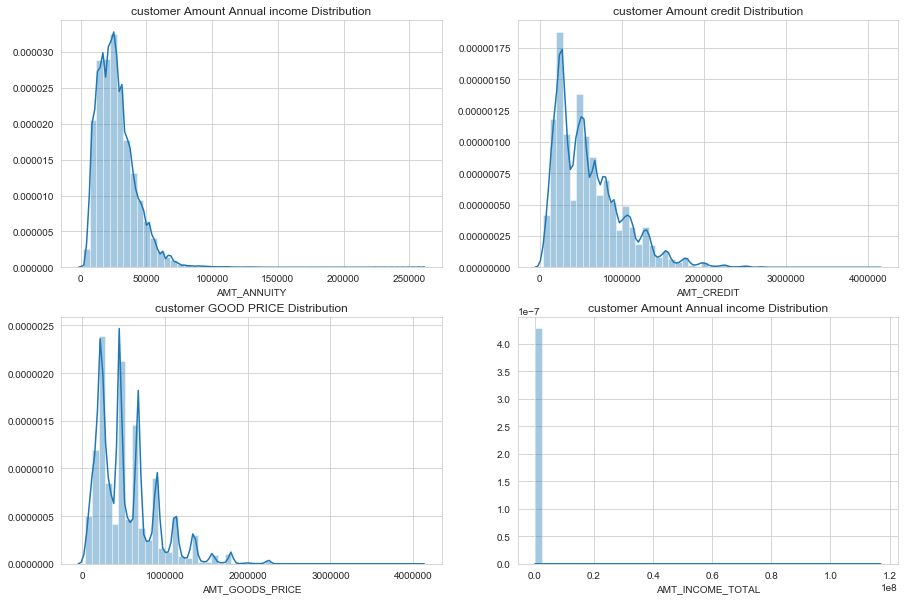

In [71]:
f, ax = plt.subplots(2,2, figsize=(15, 10))
sns.distplot(application_data.AMT_ANNUITY.dropna(), kde=True, ax=ax[0,0]).set_title('customer Amount Annual income Distribution')
sns.distplot(application_data.AMT_CREDIT.dropna(), kde=True, ax=ax[0,1]).set_title('customer Amount credit Distribution')
sns.distplot(application_data.AMT_GOODS_PRICE.dropna(), kde=True, ax=ax[1,0]).set_title('customer GOOD PRICE Distribution')
sns.distplot(application_data.AMT_INCOME_TOTAL.dropna(), kde=True, ax=ax[1,1]).set_title('customer Amount Annual income Distribution')

In [ ]:
sns.set_style('whitegrid')
f, ax = plt.subplots(2,2, figsize=(15, 10))

# Graph amt annutiy Satisfaction
sns.distplot(application_data.DAYS_BIRTH.dropna(), kde=True, ax=ax[0,0]).set_title('customer Days birth Distribution')

sns.distplot(application_data.DAYS_EMPLOYED.dropna(), kde=True,  ax=ax[0,1]).set_title('customer Employed Distribution')

sns.distplot(application_data.DAYS_ID_PUBLISH.dropna(), kde=True, ax=ax[1,0]).set_title('customer ID Publish Distribution')


sns.distplot(application_data.DAYS_REGISTRATION.dropna(), kde=True, ax=ax[1,1]).set_title('customer Days of Registration Distribution')

# Based on region and city

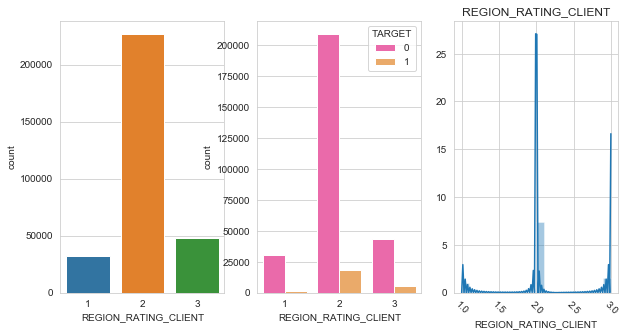

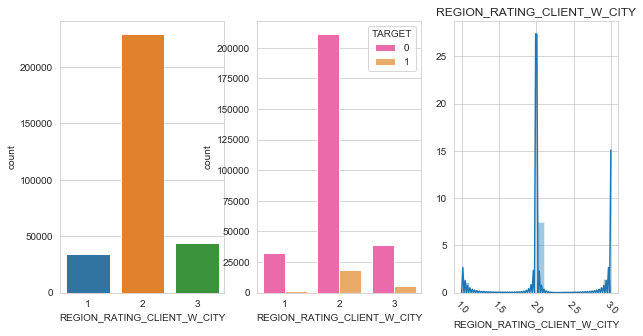

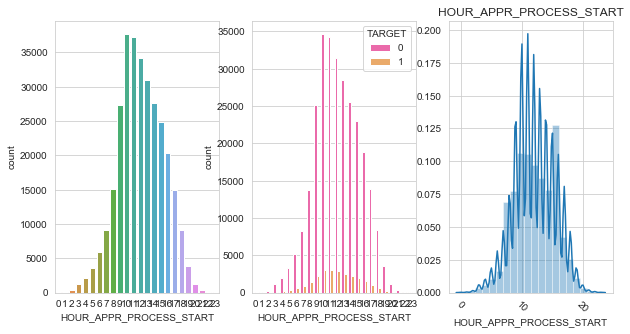

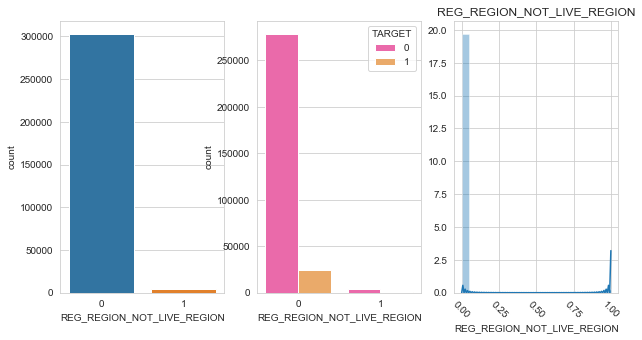

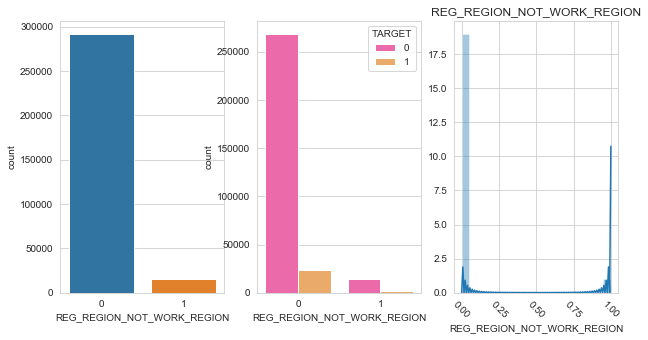

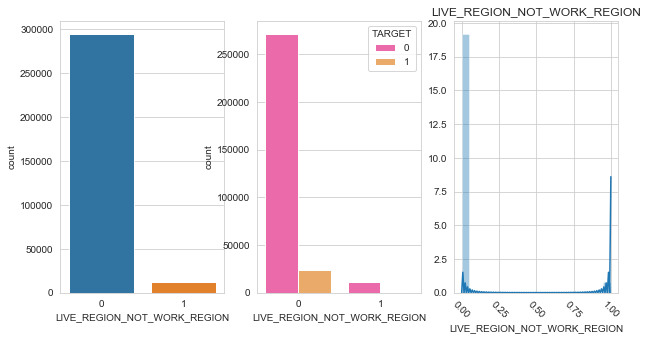

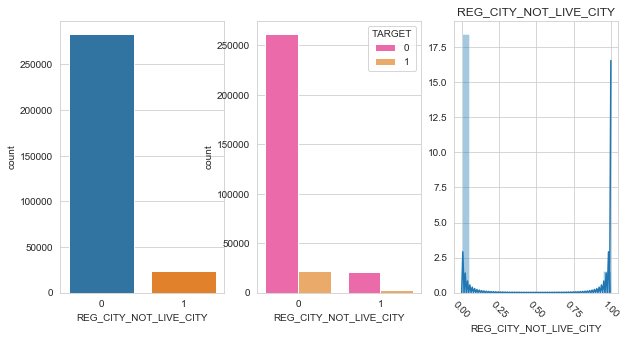

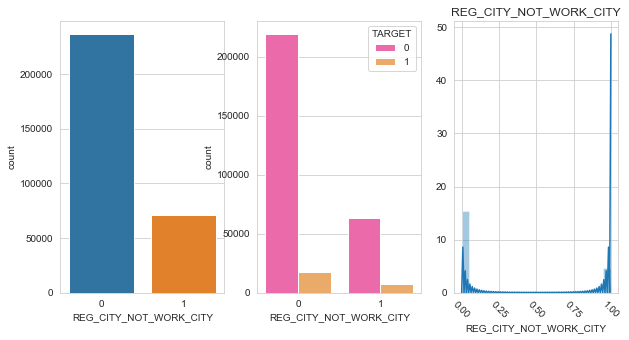

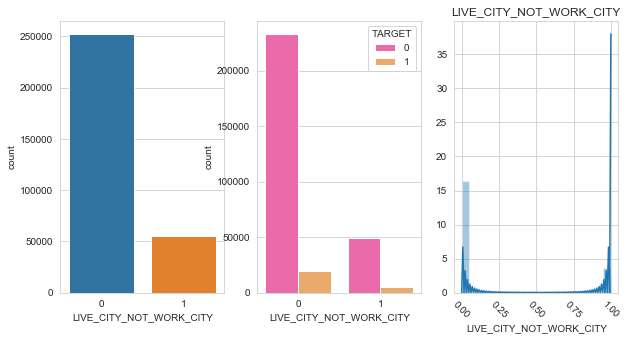

In [72]:
visual_dat= ['REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']


for i in visual_dat:
    plt.figure(figsize = (10,5))
    plt.subplot(1,3,1)
    sns.countplot(application_data[i])
    plt.subplot(1,3,2)
    sns.countplot(application_data[i],hue=application_data['TARGET'],palette="spring")
    plt.subplot(1,3,3)
    sns.distplot(application_data[i],bins= 20) 
    plt.title(i)
    plt.xticks(rotation=-45)
    plt.show()

Analysis based on EXT_SOURCE

Text(0.5, 1.0, 'EXt Source 3 Distribution')

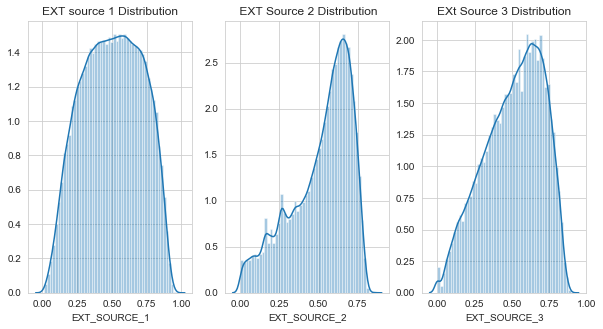

In [73]:
f, ax = plt.subplots(ncols=3,figsize=(10, 5))


sns.distplot(application_data.EXT_SOURCE_1.dropna(), kde=True,ax=ax[0]).set_title('EXT source 1 Distribution')



sns.distplot(application_data.EXT_SOURCE_2.dropna(), kde=True,ax=ax[1]).set_title(' EXT Source 2 Distribution')

 
sns.distplot(application_data.EXT_SOURCE_3.dropna(), kde=True, ax=ax[2]).set_title('EXt Source 3 Distribution')

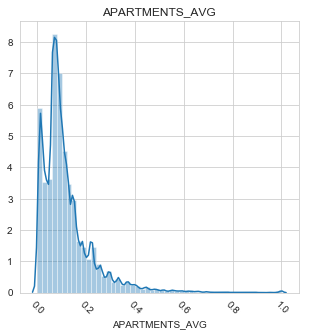

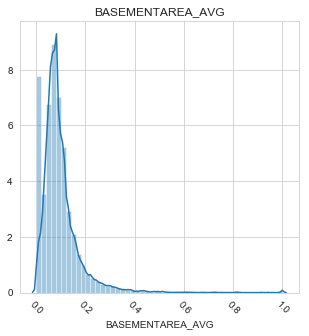

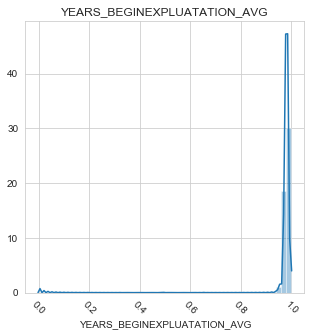

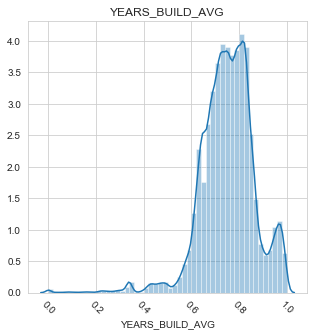

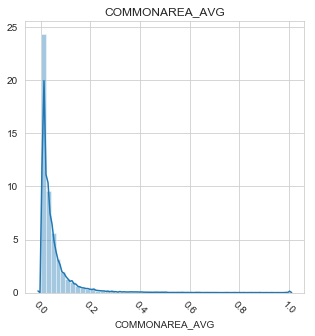

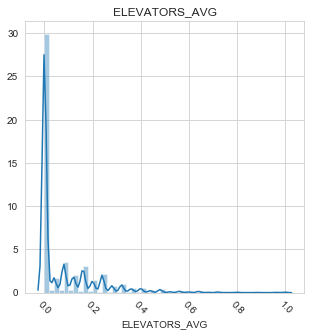

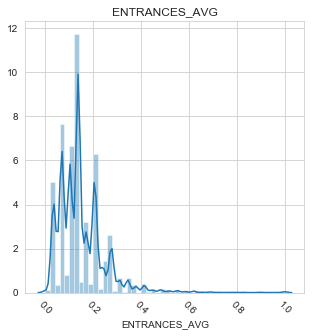

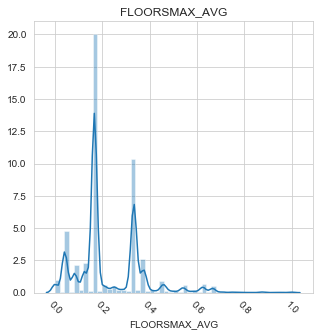

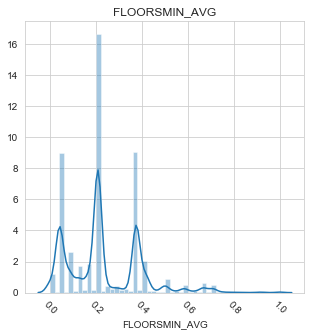

In [74]:
val_p=['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG']
for i in val_p:
    plt.figure(figsize = (5,5))
    sns.distplot(application_data[i].dropna(), kde=True)        
    plt.title(i)
    plt.xticks(rotation=-45)
    plt.show()

Checking the Correlation Between The Features for Application_data



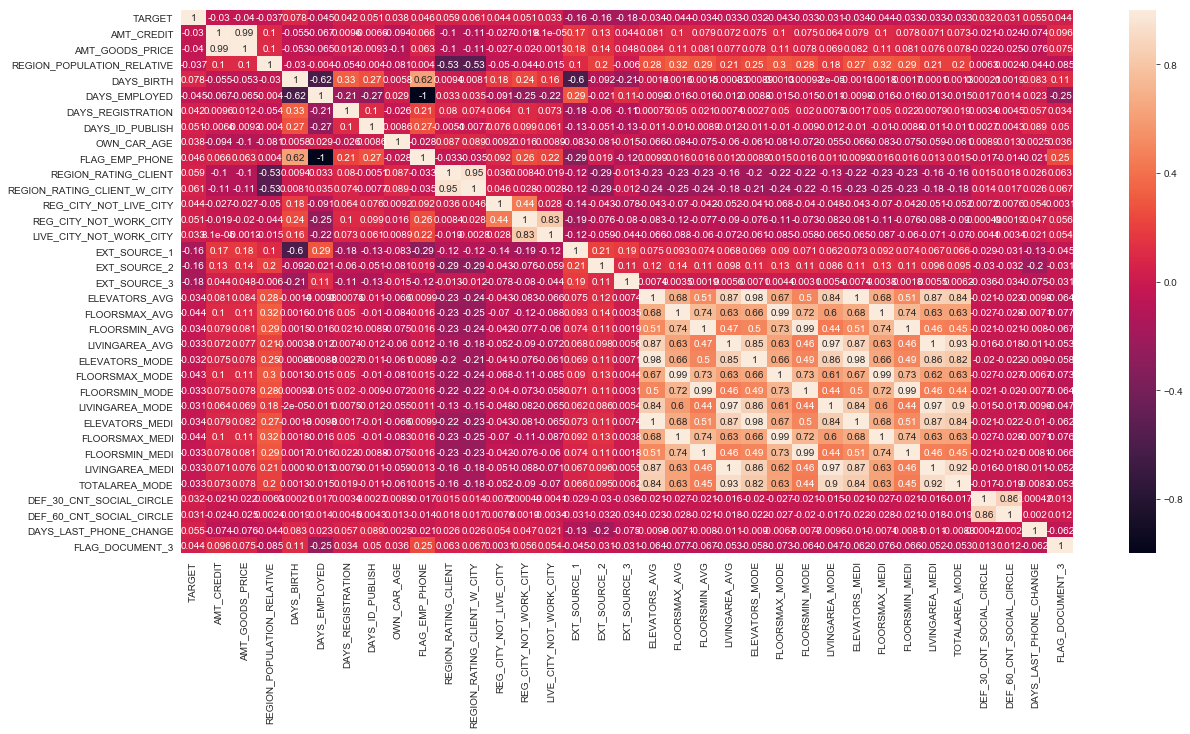

In [75]:
corrmat = application_data.corr()
top_corr_features = corrmat.index[abs(corrmat["TARGET"])>=0.03]
plt.figure(figsize=(20,10))
g = sns.heatmap(application_data[top_corr_features].corr(),annot=True)


By see above corelation plot we can find out the most corelated featuers along with they corelated values. (needs improvemet in heat map)


and all kind of analysis are done for the application_data









# Derived metrics 

Here, we derive some new columns based on our understanding of the domain



# Multivariate analysis



# Conclusion



#### Top 5 `driver variables` which can help us predict whether a custumor might default or now.

- Employment length
- Purpose of loan

